(25, 4)
[4.43471157 8.75595036 5.43905629 3.65148372 1.91485422 5.25198375
 7.63216876 5.77350269 4.42530602 4.03112887 1.82574186 4.39696865
 4.89897949 6.70198975 4.78713554 2.1602469  3.10912635 4.11298756
 2.5819889  5.37742193 6.60807587 4.57347424 5.37742193 3.40342964
 7.41619849]
11.968537708372759 0.46507402673296216 9.068943521292763 1.3809851201968568


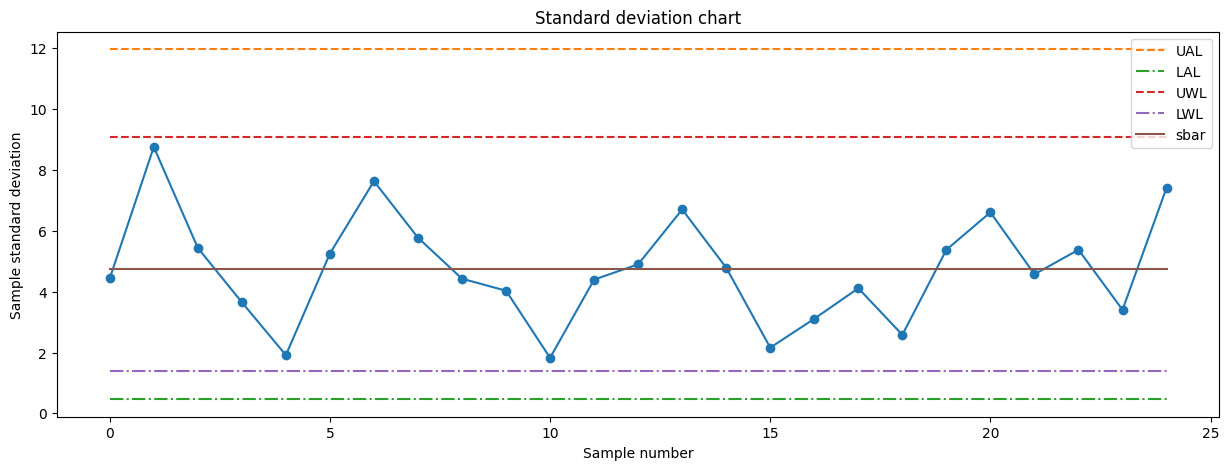

In [12]:
# Standard deviation chart or sigma chart
# sigma chart is used when we get a sample of measurements at each time instant or bach  
# This python code creates sigma chart for steel rod cutting process

# Chapter 7, Statistical Process Control By John Oakland

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#from google.colab import files
#uploaded = files.upload()

#import io
#data = pd.read_csv(io.BytesIO(uploaded['example2_exercise7.csv']))

# data from process that is in statistical control
xlsx = pd.ExcelFile("/content/Table 7.4.xlsx")
data = pd.read_excel(xlsx, 'Sheet2',header=None)

data = np.array(data)
data = data.reshape(len(data),4)
print(data.shape)

n = 4  # sample size
sample_std = []

for i in range(0,len(data)):
  std = np.std(data[i,:])
  std = std * (np.sqrt(n/(n-1)))
  sample_std.append(std)

sample_std = np.array(sample_std)
print(sample_std)

sbar = np.mean(sample_std)   # average of sample standard deviations

# constants used in the calculation of control limits
Bp0_001 = 2.522  # B prime 0.001
Bp0_025 = 1.911
Bp0_975 = 0.291
Bp0_999 = 0.098

# control limits

UAL = Bp0_001 * sbar # the control limits are determined from normap operation data
UWL = Bp0_025 * sbar

LAL = Bp0_999 * sbar
LWL = Bp0_975 * sbar

print(UAL,LAL,UWL,LWL)

plt.figure(figsize=(15,5))
plt.plot(sample_std,'-o')
plt.plot(UAL * np.ones((len(sample_std),1)), '--', label='UAL')
plt.plot(LAL * np.ones((len(sample_std),1)), '-.', label='LAL')
plt.plot(UWL * np.ones((len(sample_std),1)), '--', label='UWL')
plt.plot(LWL * np.ones((len(sample_std),1)), '-.', label='LWL')
plt.plot(sbar* np.ones((len(sample_std),1)), label='sbar')   # central or target line
plt.xlabel("Sample number")
plt.ylabel("Sample standard deviation")
plt.legend()
# displaying the title
plt.title("Standard deviation chart")
plt.show()








